<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">ETUDE DE MARCHE LAPOULE - VISUALISATION</h1>
</div>

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement du fichier</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [1]:
#Importation de la librairie Pandas
import pandas as pd
#Importation de la librairie plotly express
import plotly.express as px
#Importation de la librairie seaborn
import seaborn as sns
#Importation de la librairie datetime
from datetime import datetime, date
#Importation de la librairie pyplot
import matplotlib.pyplot as plt
#Importation de la librairie numpy
import numpy as np
#Importation des librairies CAH (Classification Ascendante Hiérarchique)
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
#Importation de la librairie KMeans
from sklearn.cluster import KMeans
#Importation de la librairie ACP (Analyse de la Composante Principale)
from sklearn.decomposition import PCA
#Importation de la librairie preprocessing
from sklearn import decomposition
from sklearn import preprocessing

In [2]:
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    """Display correlation circles, one for each factorial plane"""

    # For each factorial plane
    for d1, d2 in axis_ranks: 
        if d2 < n_comp:

            # Initialise the matplotlib figure
            fig, ax = plt.subplots(figsize=(10,10))

            # Determine the limits of the chart
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # Add arrows
            # If there are more than 30 arrows, we do not display the triangle at the end
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (see the doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # Display variable names
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # Display circle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # Define the limits of the chart
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # Display grid lines
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # Label the axes, with the percentage of variance explained
            plt.xlabel('PC{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('PC{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Correlation Circle (PC{} and PC{})".format(d1+1, d2+1))
            plt.show(block=False)

In [3]:
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    '''Display a scatter plot on a factorial plane, one for each factorial plane'''

    # For each factorial plane
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # Initialise the matplotlib figure      
            fig = plt.figure(figsize=(7,6))
        
            # Display the points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # Display the labels on the points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # Define the limits of the chart
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # Display grid lines
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # Label the axes, with the percentage of variance explained
            plt.xlabel('PC{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('PC{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection of points (on PC{} and PC{})".format(d1+1, d2+1))
            #plt.show(block=False)

In [4]:
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements du fichier CSV précédemment exporté</h3>
</div>

In [5]:
#Importation du fichier datas_lapoule.csv
df_datas_for_cah = pd.read_csv("datas_lapoule.csv", sep = ',', header=[0, 1, 2])
df_datas_for_cah.rename(columns={('Zone', 'Unnamed: 6_level_1', 'Unnamed: 6_level_2'): 'Zone'})
df_datas_for_cah['Zone_Index'] = df_datas_for_cah['Zone'].astype(str)
df_datas_for_cah.set_index('Zone_Index', inplace=True)
df_datas_for_cah.drop(('Zone', 'Unnamed: 6_level_1', 'Unnamed: 6_level_2'), axis=1, inplace=True)

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Classification ascendante hiérarchique</h2>
</div>

In [6]:
X = df_datas_for_cah.values
standard_scale = preprocessing.StandardScaler().fit(X)
X_standardized = standard_scale.transform(X)

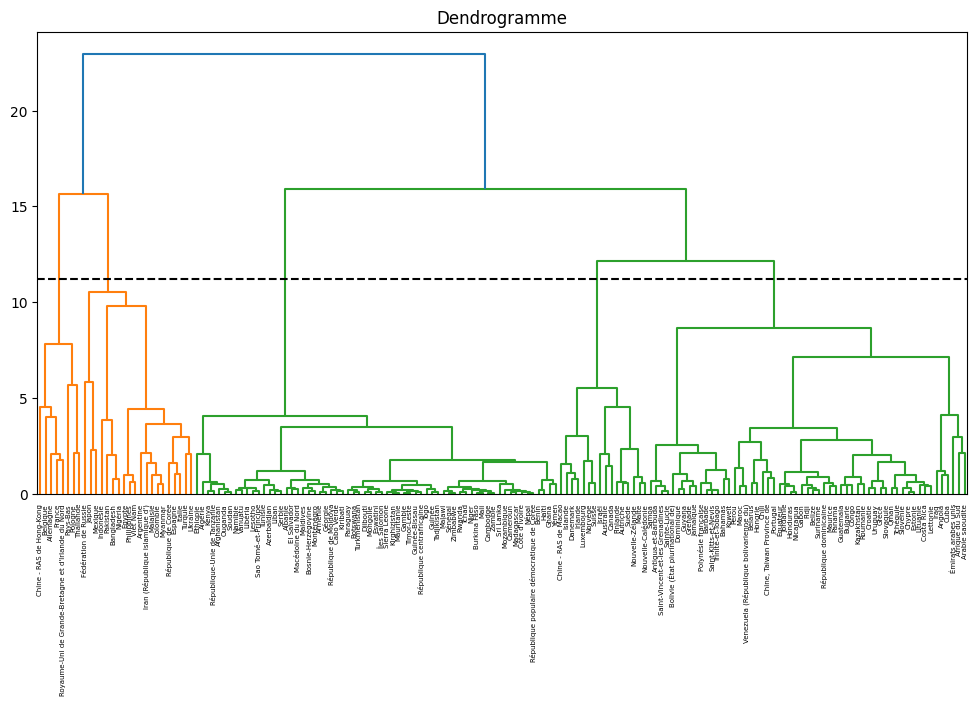

In [7]:
plt.figure(figsize=(12, 6))
Z = sch.linkage(X_standardized, method='ward')
sch.dendrogram(Z, labels = df_datas_for_cah.index)
plt.axhline(y=11.2, color='black', linestyle='dashed')
plt.title('Dendrogramme')
plt.show()

In [8]:
df_standardized_for_cah = pd.DataFrame(X_standardized, columns=df_datas_for_cah.columns)
df_standardized_for_cah.insert(0, column='Zone', value=df_datas_for_cah.index)

In [9]:
agg_clustering = AgglomerativeClustering(n_clusters=5)
agg_clustering.fit(X_standardized)

AgglomerativeClustering(n_clusters=5)

In [10]:
df_standardized_for_cah['cluster_cah'] = agg_clustering.labels_
df_standardized_for_cah.set_index('Zone', inplace=True)

In [11]:
for i in df_standardized_for_cah.sort_values('cluster_cah')['cluster_cah'].unique():
    print('Cluster', i, ':', len(df_standardized_for_cah[df_standardized_for_cah['cluster_cah']==i]), 'pays\n' + 
        ', '.join(df_standardized_for_cah[df_standardized_for_cah['cluster_cah']==i].index.values), '\n')

Cluster 0 : 20 pays
Argentine, Bangladesh, Colombie, Espagne, Fédération de Russie, Indonésie, Iran (République islamique d'), Italie, Japon, Malaisie, Mexique, Myanmar, Nigéria, Pakistan, Philippines, République de Corée, Turquie, Ukraine, Viet Nam, Égypte 

Cluster 1 : 57 pays
Afrique du Sud, Angola, Antigua-et-Barbuda, Arabie saoudite, Bahamas, Barbade, Belize, Bolivie (État plurinational de), Bulgarie, Bélarus, Chili, Chine, Taiwan Province de, Chypre, Congo, Costa Rica, Croatie, Cuba, Dominique, Estonie, Fidji, Gabon, Grenade, Grèce, Guatemala, Guyana, Honduras, Hongrie, Iraq, Jamaïque, Jordanie, Kazakhstan, Koweït, Lettonie, Lituanie, Maroc, Maurice, Nicaragua, Oman, Panama, Polynésie française, Portugal, Pérou, Roumanie, République dominicaine, Saint-Kitts-et-Nevis, Saint-Vincent-et-les Grenadines, Sainte-Lucie, Samoa, Slovaquie, Slovénie, Suriname, Tchéquie, Trinité-et-Tobago, Uruguay, Venezuela (République bolivarienne du), Émirats arabes unis, Équateur 

Cluster 2 : 65 pays
A

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Méthode de partitionnement K-Means</h2>
</div>

In [12]:
model = KMeans(n_clusters=5, n_init=10)
model.fit(X_standardized)
model.predict(X_standardized)
model.labels_
df_standardized_for_cah['cluster_kmeans'] = model.labels_
df_datas_for_cah['cluster_cah'] = df_standardized_for_cah['cluster_cah']
df_datas_for_cah['cluster_kmeans'] = df_standardized_for_cah['cluster_kmeans']

In [13]:
df_datas_for_cah.groupby(['cluster_cah']).mean()

,Disponibilité alimentaire (Kcal/personne/jour),Exportations - Quantité,Importations - Quantité,Population totale millions,Production,"Valeur US $, aux prix du 2015",cluster_kmeans
,Viande de Volailles,Viande de Volailles,Viande de Volailles,Population-Estimations,Viande de Volailles,Produit Intérieur Brut Par Habitant,
,2017,2017,2017,2017,2017,2017,
cluster_cah,,,,,,,
0,76.100000,77.150000,182.300000,102.958593,1680.200000,10807.087505,2.00000
1,115.912281,19.508772,88.736842,9.661815,215.105263,12266.496191,0.77193
2,24.569231,0.769231,17.738462,14.541804,44.830769,2462.517977,0.00000
3,95.125000,758.000000,504.625000,44.642348,1336.500000,35138.415877,3.00000
4,112.562500,36.312500,46.750000,7.812526,279.062500,57083.730541,3.25000


In [14]:
df_datas_for_cah.groupby(['cluster_kmeans']).mean()

,Disponibilité alimentaire (Kcal/personne/jour),Exportations - Quantité,Importations - Quantité,Population totale millions,Production,"Valeur US $, aux prix du 2015",cluster_cah
,Viande de Volailles,Viande de Volailles,Viande de Volailles,Population-Estimations,Viande de Volailles,Produit Intérieur Brut Par Habitant,
,2017,2017,2017,2017,2017,2017,
cluster_kmeans,,,,,,,
0,33.845238,3.559524,38.773810,14.507441,77.166667,3954.501022,1.773810
1,143.973684,18.973684,32.736842,4.208796,151.421053,15638.164525,1.315789
2,81.652174,70.304348,214.869565,94.814222,1624.000000,10845.756404,0.130435
3,95.125000,758.000000,504.625000,44.642348,1336.500000,35138.415877,3.000000
4,102.692308,49.923077,89.384615,9.294358,281.230769,62527.281155,3.769231


In [15]:
#Les clusters CAH et K-Means sont relativement proches (attention à chaque exécution le numéro de cluster peut changer)
#Ex: le cluster 3 CAH est égale au cluster 3 K-Means
#Et le cluster 4 CAH est égale au cluster 1 K-Means

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.1 - Méthode du coude</h3>
</div>

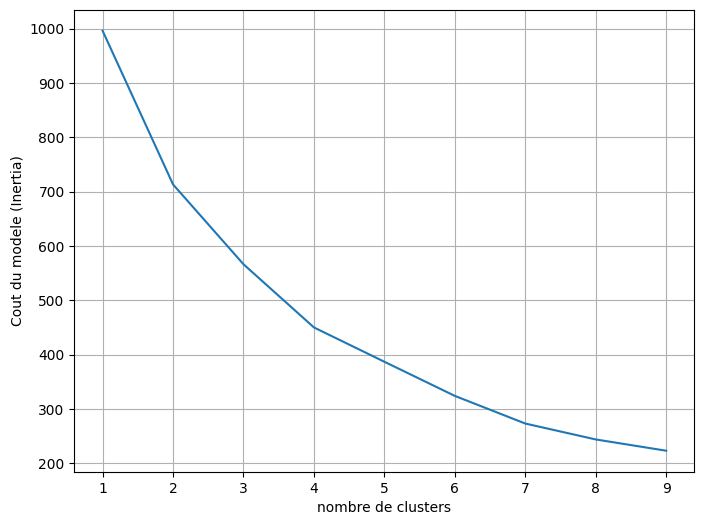

In [16]:
inertia = []
k_range=range(1, 10)
for k in k_range:
    model=KMeans(n_clusters=k, n_init=10).fit(X_standardized)
    inertia.append(model.inertia_)
    
plt.figure(figsize=(8, 6))
plt.plot(k_range,inertia )
plt.xlabel('nombre de clusters')
plt.ylabel('Cout du modele (Inertia)')
plt.grid()
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.2 - Visualisation des clusters et centroîdes</h3>
</div>

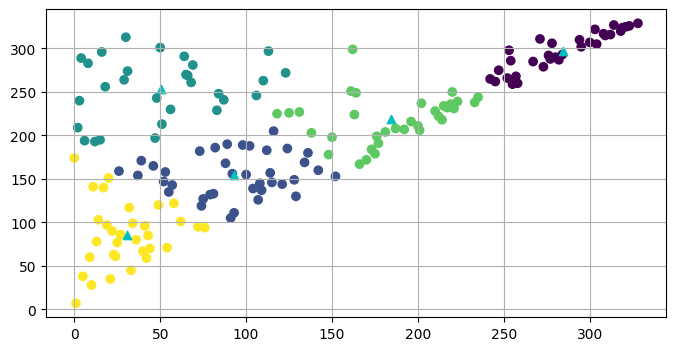

Inertie totale : 323503.6677466018


In [17]:
#On utilise la matrice de distance euclidienne CAH
plt.figure(figsize=(8, 4))
model = KMeans(n_clusters=5, n_init=10)
model.fit(Z)
model.predict(Z)
plt.scatter(Z[:,0], Z[:,1], c=model.predict(Z))
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker='^',c='c')
plt.grid()
plt.show()
print('Inertie totale :', model.inertia_)

In [18]:
for i in df_standardized_for_cah.sort_values('cluster_kmeans')['cluster_kmeans'].unique():
    print('Cluster', i, ':', len(df_standardized_for_cah[df_standardized_for_cah['cluster_kmeans']==i]), 'pays\n' + 
        ', '.join(df_standardized_for_cah[df_standardized_for_cah['cluster_kmeans']==i].index.values), '\n')

Cluster 0 : 84 pays
Afghanistan, Albanie, Algérie, Angola, Arménie, Azerbaïdjan, Bosnie-Herzégovine, Botswana, Bulgarie, Burkina Faso, Bénin, Cabo Verde, Cambodge, Cameroun, Congo, Croatie, Cuba, Côte d'Ivoire, Djibouti, El Salvador, Eswatini, Gambie, Ghana, Grèce, Guatemala, Guinée, Guinée-Bissau, Géorgie, Haïti, Honduras, Iraq, Kazakhstan, Kenya, Kirghizistan, Kiribati, Lesotho, Lettonie, Liban, Libéria, Macédoine du Nord, Madagascar, Malawi, Maldives, Mali, Maroc, Mauritanie, Mongolie, Monténégro, Mozambique, Namibie, Nicaragua, Niger, Népal, Oman, Ouganda, Paraguay, Roumanie, Rwanda, République centrafricaine, République de Moldova, République populaire démocratique de Corée, République-Unie de Tanzanie, Sao Tomé-et-Principe, Serbie, Sierra Leone, Slovaquie, Soudan, Sri Lanka, Sénégal, Tadjikistan, Tchad, Timor-Leste, Togo, Tunisie, Turkménistan, Uruguay, Vanuatu, Venezuela (République bolivarienne du), Yémen, Zambie, Zimbabwe, Équateur, Éthiopie, Îles Salomon 

Cluster 1 : 38 pays

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.3 - Distribution des variables par cluster</h3>
</div>

In [19]:
df_nolevel = df_datas_for_cah.droplevel(2, axis=1) 
df_nolevel = df_nolevel.droplevel(1, axis=1) 

[Text(0.5, 0, 'Cluster CAH'), Text(0, 0.5, 'Importation')]

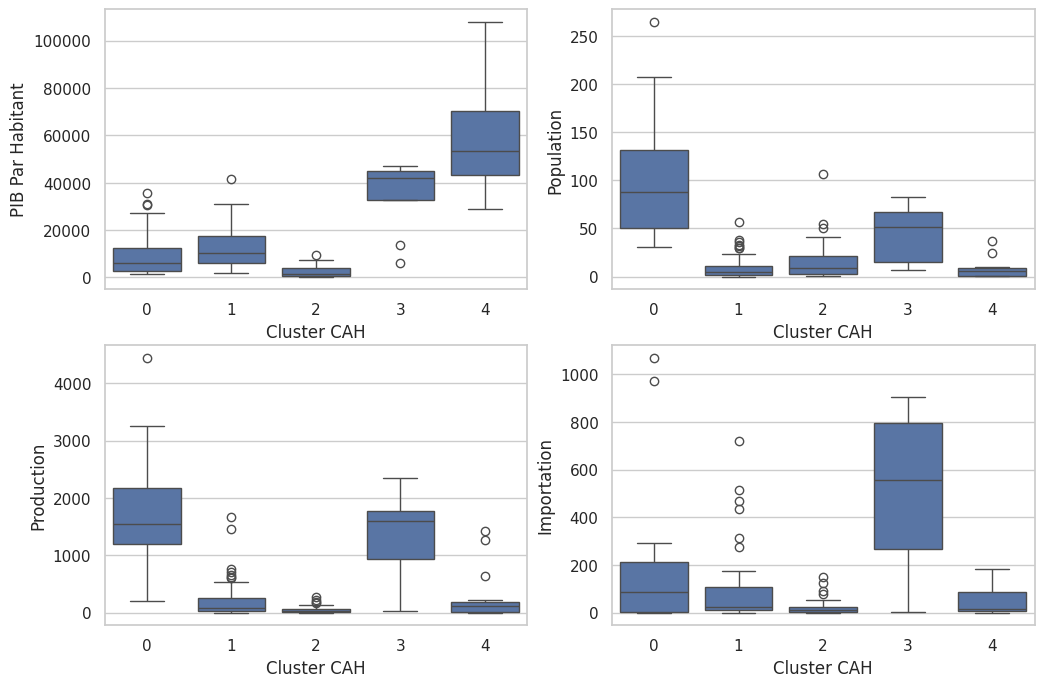

In [20]:
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(data=df_nolevel, x='cluster_cah', y='Valeur US $, aux prix du 2015').set(xlabel='Cluster CAH', ylabel='PIB Par Habitant')
plt.subplot(222)
sns.boxplot(data=df_nolevel, x='cluster_cah', y='Population totale millions').set(xlabel='Cluster CAH', ylabel='Population')
plt.subplot(223)
sns.boxplot(data=df_nolevel, x='cluster_cah', y='Production').set(xlabel='Cluster CAH', ylabel='Production')
plt.subplot(224)
sns.boxplot(data=df_nolevel, x='cluster_cah', y='Importations - Quantité').set(xlabel='Cluster CAH', ylabel='Importation')

[Text(0.5, 0, 'Cluster CAH'), Text(0, 0.5, 'Disponibilité alimentaire')]

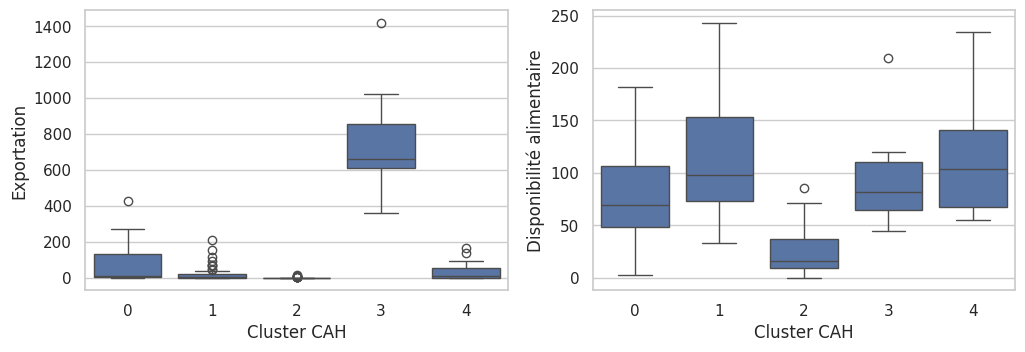

In [21]:
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(data=df_nolevel, x='cluster_cah', y='Exportations - Quantité').set(xlabel='Cluster CAH', ylabel='Exportation')
plt.subplot(222)
sns.boxplot(data=df_nolevel, x='cluster_cah', y='Disponibilité alimentaire (Kcal/personne/jour)').set(xlabel='Cluster CAH', ylabel='Disponibilité alimentaire')

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4- Analyse en composantes principales</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.1 - Eboulis des valeurs propres</h3>
</div>

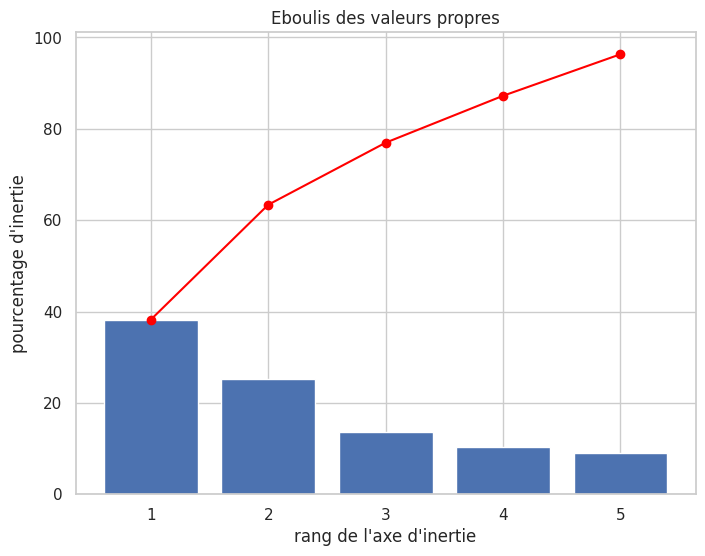

In [22]:
pca = decomposition.PCA(n_components=5)
pca.fit(X_standardized)
plt.figure(figsize=(8, 6))
display_scree_plot(pca)
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.2 - Cercle des corrélations</h3>
</div>

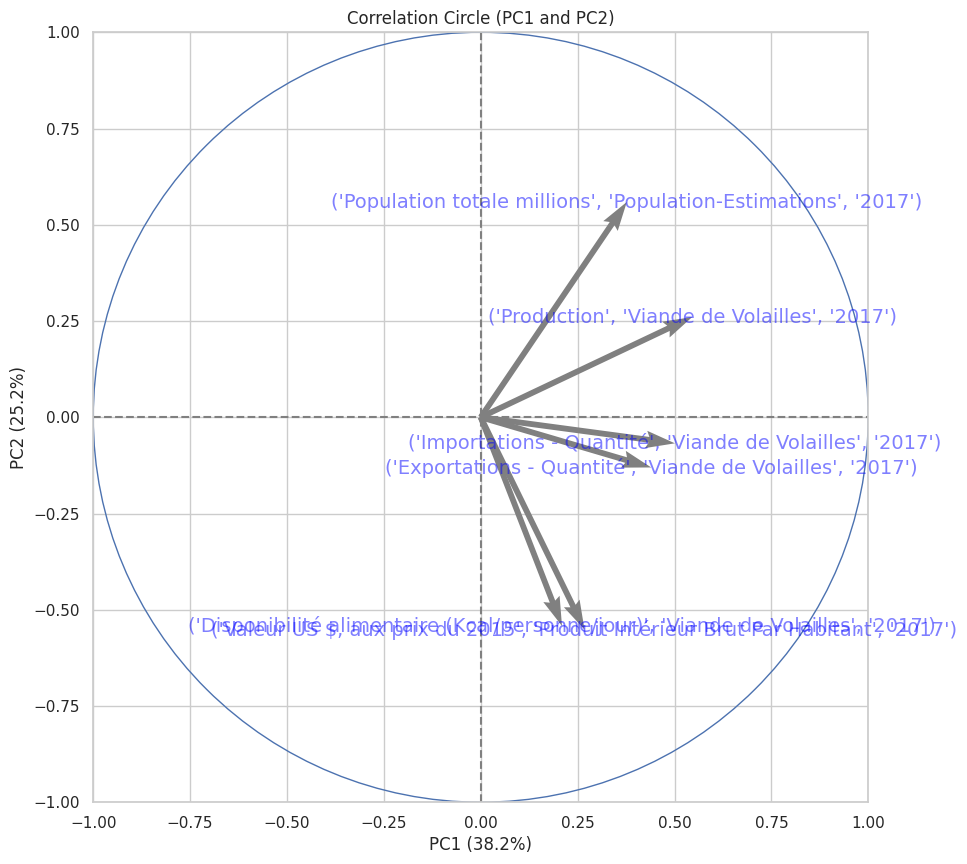

In [23]:
pcs = pca.components_
display_circles(pcs, 2, pca, [(0,1),(2,3)], labels = np.array(df_standardized_for_cah.columns) )
plt.show()

In [24]:
#La production, exportation et importation sont corrélé positivement à PC1 ==> On peut associer PC1 à des flux économiques
#La population est corrélée positivement à PC2 alors que la dispo alimentaire
#et le PIB par habitant sont corrélés négativement ==> On peut associer PC2 à des indices démographiques et économiques
#Ainsi plus la population va augmenter et plus le PIB par habitant et la dispo alimentarire vont diminuer

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.3 - Projection des individus avec les clusters CAH</h3>
</div>

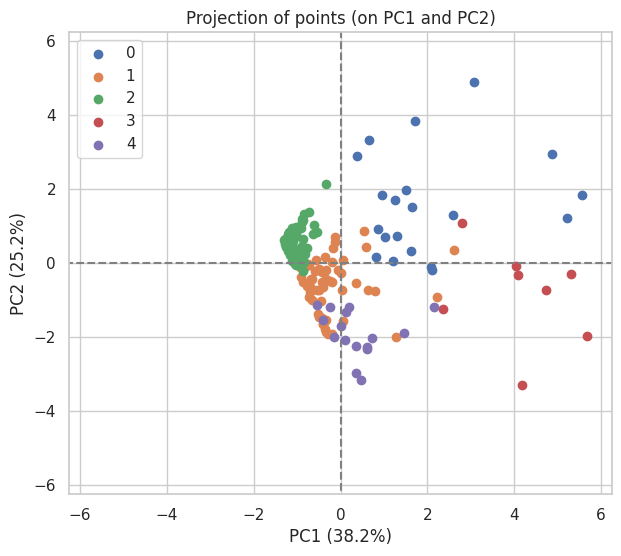

<Figure size 1000x1000 with 0 Axes>

In [25]:
X_projected = pca.transform(X_standardized)
display_factorial_planes(X_projected, 2, pca, [(0,1),(2,3)], illustrative_var = df_standardized_for_cah['cluster_cah'], alpha = 1)
plt.figure(figsize=(10, 10))
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.4 - Projection des individus avec les clusters K-Means</h3>
</div>

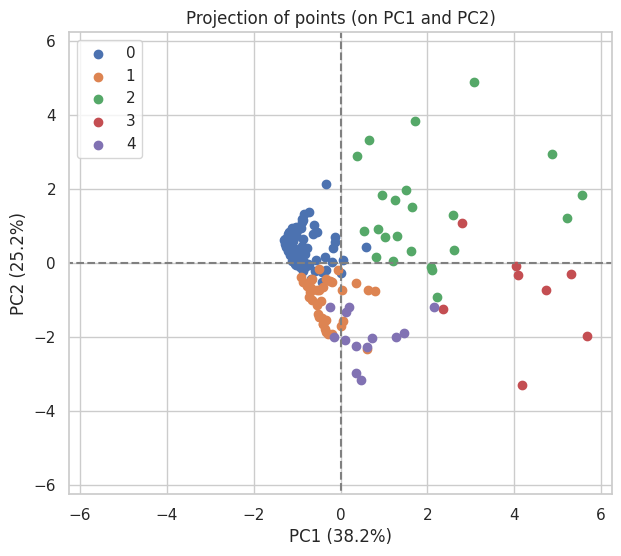

<Figure size 1000x1000 with 0 Axes>

In [26]:
X_projected = pca.transform(X_standardized)
display_factorial_planes(X_projected, 2, pca, [(0,1),(2,3)], illustrative_var = df_standardized_for_cah['cluster_kmeans'], alpha = 1)
plt.figure(figsize=(10, 10))
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.5 - Projection des individus avec le nom des pays</h3>
</div>

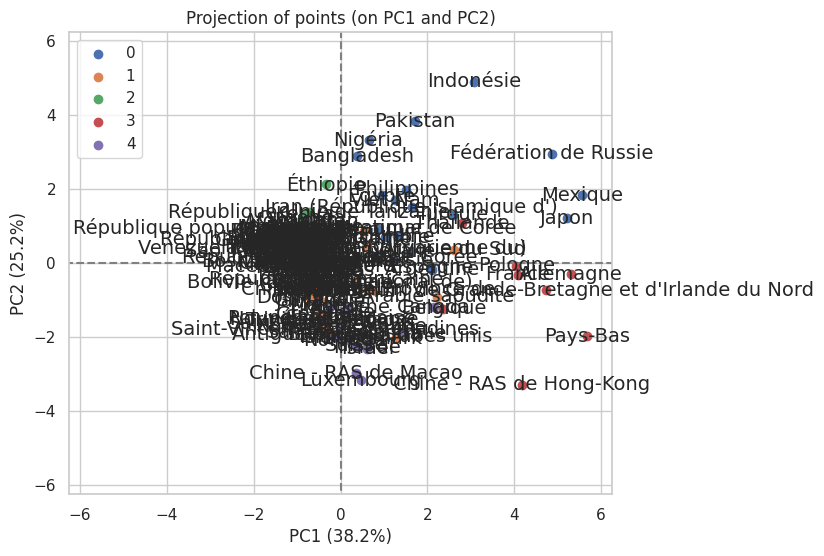

<Figure size 1000x1000 with 0 Axes>

In [27]:
X_projected = pca.transform(X_standardized)
display_factorial_planes(X_projected, 2, pca, [(0,1),(2,3)], labels = df_datas_for_cah.index, illustrative_var = df_standardized_for_cah['cluster_cah'], alpha = 1)
plt.figure(figsize=(10, 10))
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.6 - Liste des pays retenus</h3>
</div>

In [28]:
#Les pays retenus pour l'étude sont issus des clusters 3 CAH et K-Means en zone euro
#Le PIB par habitant est assez élevé ansi que la population avec une dispo alimentaire assez faible
#Ces pays sont proches de la France et la logistique à mettre en oeuvre pour l'export reste relativement simple
#Avec un risque quasi inexistant d'avoir une réglementation spécifique
lst_pays_retenus = ("Allemagne", "Belgique", "Pays-Bas", "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord")
df_datas_for_cah[df_datas_for_cah.index.isin(lst_pays_retenus)]

,Disponibilité alimentaire (Kcal/personne/jour),Exportations - Quantité,Importations - Quantité,Population totale millions,Production,"Valeur US $, aux prix du 2015",cluster_cah,cluster_kmeans
,Viande de Volailles,Viande de Volailles,Viande de Volailles,Population-Estimations,Viande de Volailles,Produit Intérieur Brut Par Habitant,,
,2017,2017,2017,2017,2017,2017,,
Zone_Index,,,,,,,,
Allemagne,71.0,646.0,842.0,82.658409,1514.0,42621.684420,3,3
Belgique,44.0,656.0,338.0,11.419748,463.0,41645.696701,3,3
Pays-Bas,70.0,1418.0,608.0,17.021347,1100.0,47281.905012,3,3
Royaume-Uni de Grande-Bretagne et d'Irlande du Nord,120.0,359.0,779.0,66.727461,1814.0,45908.979654,3,3
